# Bike Sharing Case Study
## Problem Statement

A bike-sharing system in which bikes are made available for shared use to individuals on a short term basis for a price or free. It allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Business Objective

The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_sharing_df = pd.read_csv('day.csv')

In [3]:
# Check the head of the dataset
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check rows and columns
bike_sharing_df.shape

(730, 16)

In [5]:
# Check info about the columns
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the statistical details of numeric columns
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Check if casual + registered counts equals to total "cnt"
for index, row in bike_sharing_df.iterrows():
    print(' casual+registered == cnt=>', row['casual'] + row['registered'] == row['cnt'])

 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+re

 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+re

 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+registered == cnt=> True
 casual+re

In [8]:
# Drop the columns instant, dteday, casual, registered
# instant is index column so drop it
# dteday date column. The date details captured seperately in yr, mnth, holiday, weekday, working day. So, drop dteday
# Casdual, registered count won't be available at the time of model prediction. And also, casual + registered coount eauals to total cnt. 

bike_sharing_df = bike_sharing_df.drop(['instant', 'casual', 'registered', 'dteday'],axis=1)

In [9]:
bike_sharing_df.shape

(730, 12)

In [10]:
# Print value counts for each of the column
for i in bike_sharing_df:
    print('Column=> ',i)
    print('-------------------')
    print(bike_sharing_df[i].value_counts())
    print('---------------------------')

Column=>  season
-------------------
3    188
2    184
1    180
4    178
Name: season, dtype: int64
---------------------------
Column=>  yr
-------------------
0    365
1    365
Name: yr, dtype: int64
---------------------------
Column=>  mnth
-------------------
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
---------------------------
Column=>  holiday
-------------------
0    709
1     21
Name: holiday, dtype: int64
---------------------------
Column=>  weekday
-------------------
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
---------------------------
Column=>  workingday
-------------------
1    499
0    231
Name: workingday, dtype: int64
---------------------------
Column=>  weathersit
-------------------
1    463
2    246
3     21
Name: weathersit, dtype: int64
---------------------------
Column=>  temp
-------------------
26.035000    5
10.899153 

In [11]:
# Print unique values for each of the column
for i in bike_sharing_df:
    print('Column=> ',i)
    print('-------------------')
    print(bike_sharing_df[i].unique())
    print('---------------------------')

Column=>  season
-------------------
[1 2 3 4]
---------------------------
Column=>  yr
-------------------
[0 1]
---------------------------
Column=>  mnth
-------------------
[ 1  2  3  4  5  6  7  8  9 10 11 12]
---------------------------
Column=>  holiday
-------------------
[0 1]
---------------------------
Column=>  weekday
-------------------
[6 0 1 2 3 4 5]
---------------------------
Column=>  workingday
-------------------
[0 1]
---------------------------
Column=>  weathersit
-------------------
[2 1 3]
---------------------------
Column=>  temp
-------------------
[14.110847  14.902598   8.050924   8.2        9.305237   8.378268
  8.057402   6.765      5.671653   6.184153   6.932731   7.081807
  6.59567    9.566653   9.498347   7.209153   8.883347  11.979134
 10.728347   7.2775     2.4243464  3.9573897  3.9930433  9.162598
  8.9175     7.995      8.342598   8.877402   7.414153   7.879134
 10.66       7.665237   8.663464  11.719153  11.138347   9.054153
  5.526103   5.91826

In [12]:
# From above unique values, from data dictionary,  observation is that
# 1. Season, month, weekday, weathersit are categorical values. map with appropriate string values.

bike_sharing_df.weathersit = bike_sharing_df.weathersit.map({1:'Clear',
                                     2:'Mist',
                                     3:'Light rain',
                                     4:'Heavy rain'})

bike_sharing_df.season = bike_sharing_df.season.map({1:'Spring',
                             2:'Summer',
                             3:'Fall',
                             4:'Winter'})

bike_sharing_df.mnth = bike_sharing_df.mnth.map({1:'Jan',
                         2:'Feb',
                         3:'Mar',
                         4:'Apr',
                         5:'May',
                         6:'Jun',
                         7:'Jul',
                         8:'Aug',
                         9:'Sep',
                         10:'Oct',
                         11:'Nov',
                         12:'Dec'})

bike_sharing_df.weekday = bike_sharing_df.weekday.map({0:'Sun',
                               1:'Mon',
                               2:'Tue',
                               3:'Wed',
                               4:'Thu',
                               5:'Fri',
                               6:'Sat'})

In [13]:
bike_sharing_df.shape

(730, 12)

In [14]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

- Visualize data by plotting with various plots, derive appropriate insights
- Verify for the multicollinearity
- Check which predictors have a association with target variable

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualizing all variables

Let's make pairplot of all variables

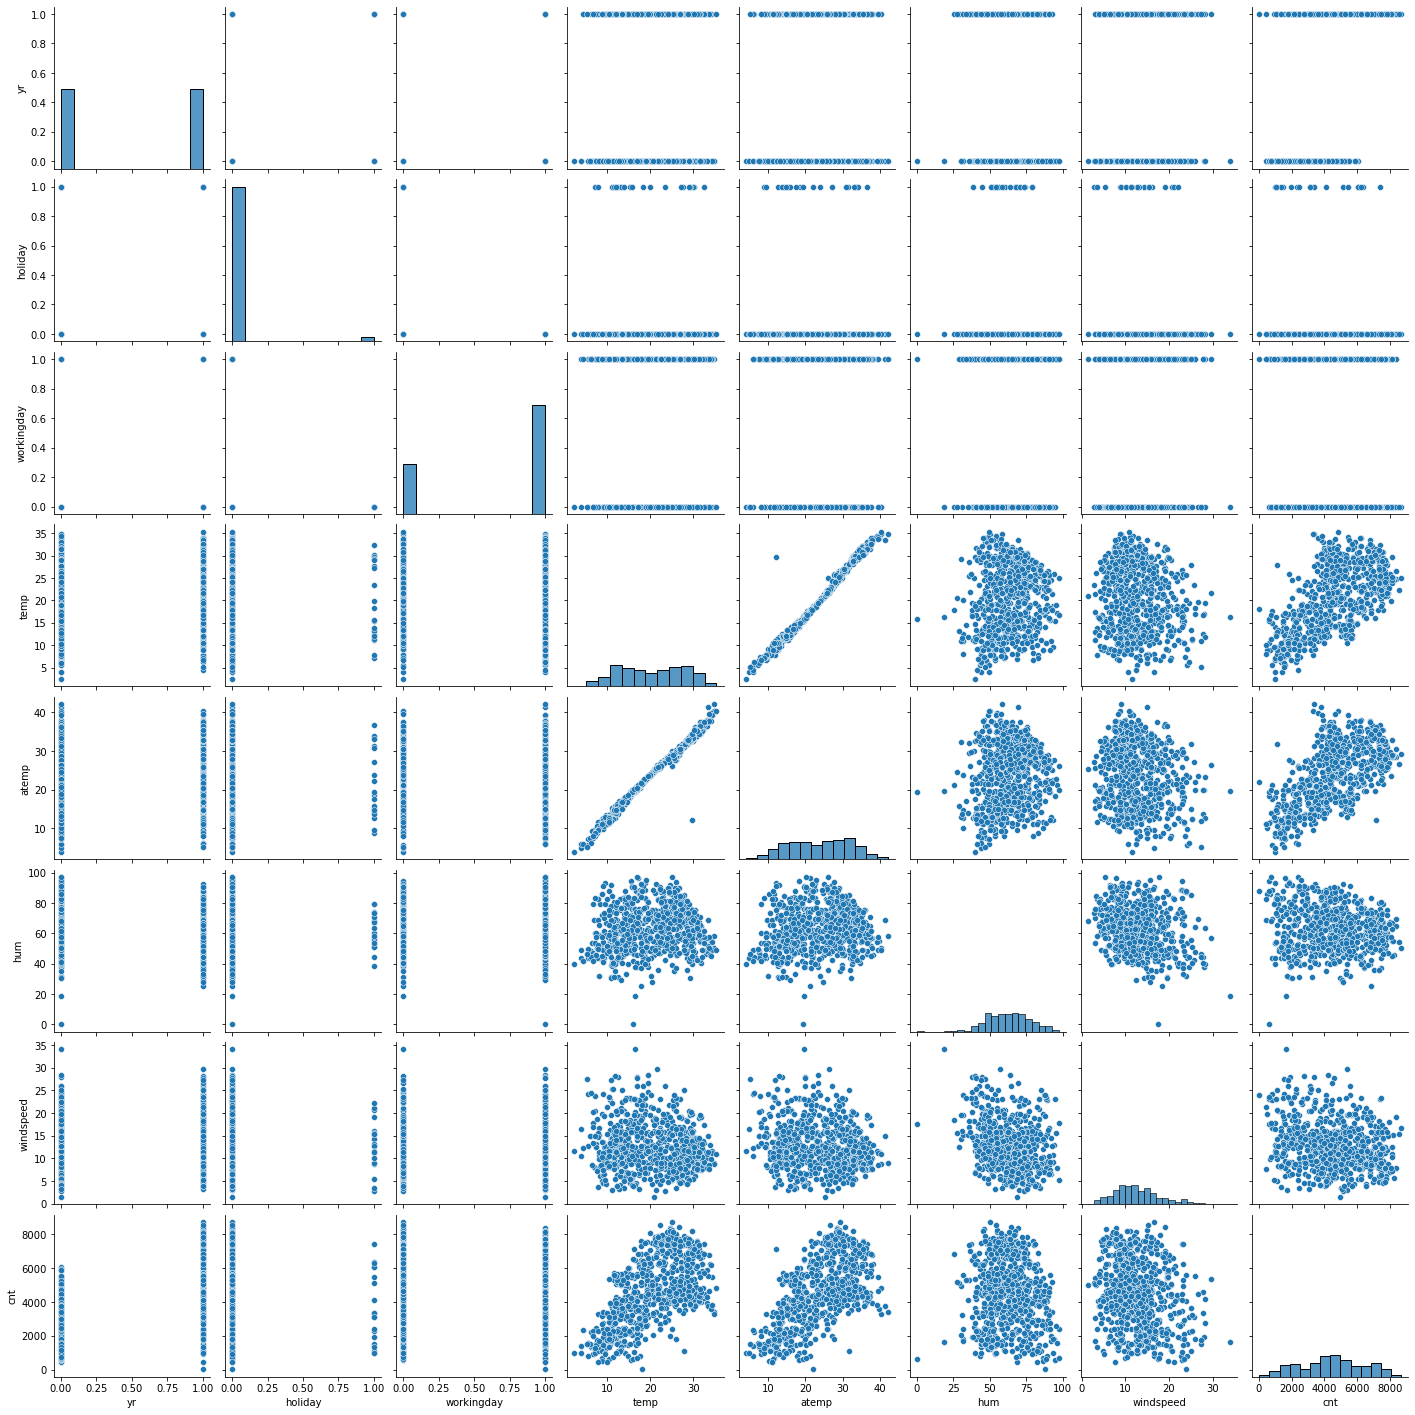

In [16]:
sns.pairplot(bike_sharing_df)
plt.show()

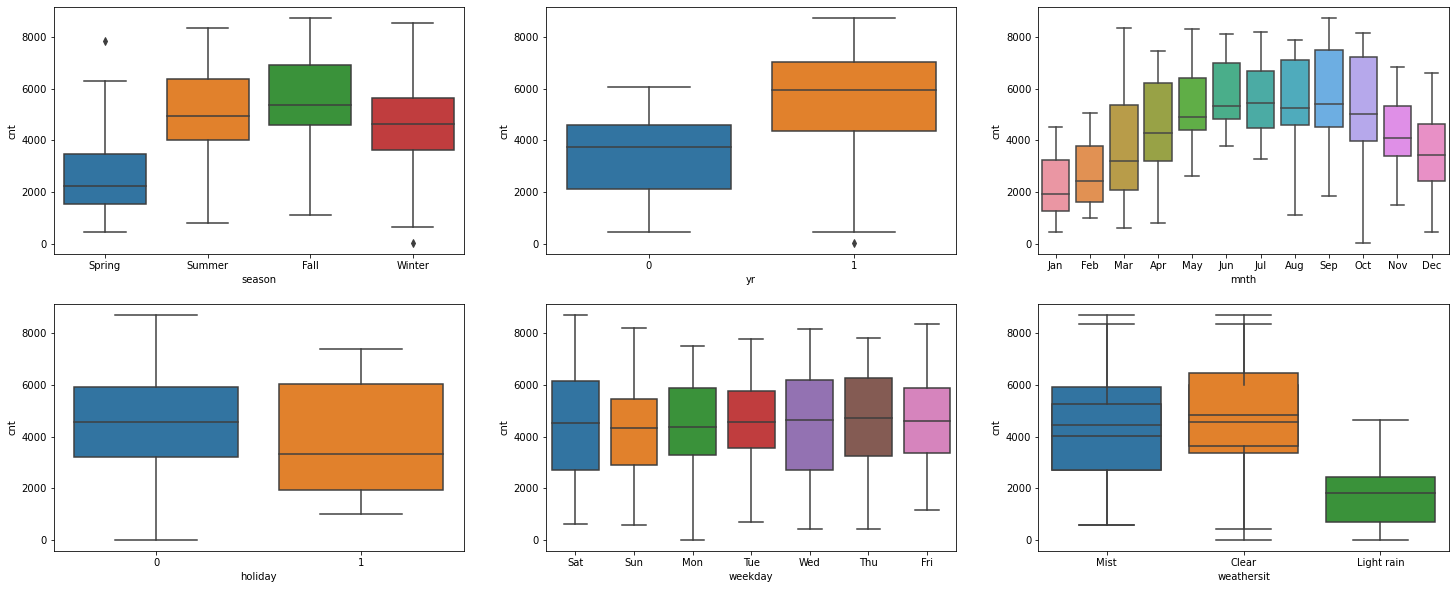

In [17]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)

plt.show()

### Insights from above box plot
#### => Number of bike rentals in Summer and Fall are higher than Spring and Winter.
#### => Number of bike rentals have gone up from 2018 to 2019.
#### => Number of bike rentals are high when weather is clear.

In [ ]:
# plotting the above 4 variables against 'cnt' to check for a linear relationship
sns.set_style('whitegrid')
sns.pairplot(bike_sharing_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',
             diag_kind=None,height=5,aspect=1);

### Insights from above plot:
#### => The linear line for temp and atemp looks pretty same or smimilar

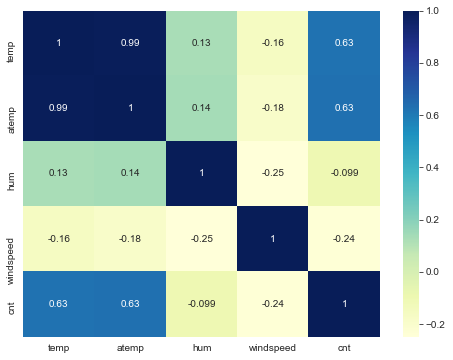

In [19]:
# Verify correlation between numeric variables
plt.figure(figsize=(8,6))
sns.heatmap(bike_sharing_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu');

In [20]:
temp_corr = bike_sharing_df[['temp','atemp']].corr().apply(lambda x : round(x,6))
temp_corr

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


### Insights from above
#### => temp and atemp are highly correlated
#### => atemp being feel like temp, which seems to be doesn't have any impact as atemp is same as temp
#### => atemp can be dropped 

In [21]:
# dropping the 'atemp' column
bike_sharing_df.drop(['atemp'],axis=1,inplace=True)

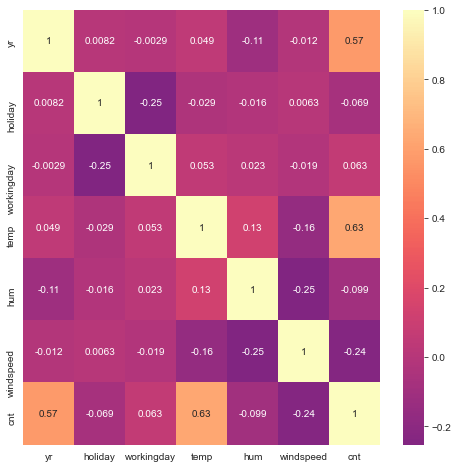

In [22]:
# plotting a heat map for all the variables in the data
plt.figure(figsize=(8,8))
sns.heatmap(bike_sharing_df.corr(),annot=True,cmap='magma',center=0);

### Insights:
#### => A high correlation can be seen in between 'cnt' and 'temp' closely followed by 'cnt' and 'yr'.
#### => 'hum' and 'windspeed' have a negative correlation with 'cnt'.

## Step 3: Data Preparation

In [23]:
# Check for the data
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [24]:
# Get only categorical items. 
categorical_df = bike_sharing_df.select_dtypes(include = ['object'])

In [25]:
categorical_df.head()

,season,mnth,weekday,weathersit
0,Spring,Jan,Sat,Mist
1,Spring,Jan,Sun,Mist
2,Spring,Jan,Mon,Clear
3,Spring,Jan,Tue,Clear
4,Spring,Jan,Wed,Clear


In [26]:
# Convert categorical items to indicator variables
dummies_df = pd.get_dummies(categorical_df, drop_first = True)

In [27]:
dummies_df.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# Drop categorical items from original df as the the indicator variables created for each of the categorical variable
bike_sharing_df.drop(categorical_df.columns, axis = 1, inplace = True)

In [29]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,1,9.305237,43.6957,12.522300,1600


In [30]:
#Now, add indicator columns to the original dataframe
bike_sharing_df = pd.concat([bike_sharing_df, dummies_df], axis = 1)

In [31]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# Import library for creating train test splits
from sklearn.model_selection import train_test_split

In [33]:
# Split the data into training and test sets
np.random.seed(100)

train_df, test_df = train_test_split(bike_sharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Some of the independent variables are on different scale i.e. temp, hum, windspeed, cnt.
#### These variables should be scaled before building a model in order to be in sync with all other independent variables

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed', 'cnt']
train_df[num_vars] = scaler.fit_transform(train_df[num_vars])

In [35]:
# Santiy check after performing a scaling
train_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


#### Split training dataset into X and y sets

In [36]:
# Splitting training dataset into X and y sets
y_train = train_df.pop('cnt')
X_train = train_df

In [37]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [38]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## Step 4: Model building

In [39]:
# Import libraries to perform RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 10) # Pick top 10 features ranked by RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
# Check to see how REF ranked the columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 8),
 ('mnth_Feb', False, 9),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 18),
 ('mnth_Mar', False, 19),
 ('mnth_May', False, 10),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 13),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 12),
 ('weekday_Thu', False, 16),
 ('weekday_Tue', False, 14),
 ('weekday_Wed', False, 17),
 ('weathersit_Light rain', True, 1),
 ('weathersit_Mist', False, 2)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light rain'],
      dtype='object')

#### Build first model 

In [42]:
## Build Model with top 10 features ranked by RFE
X = X_train[col]

In [43]:
X.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light rain'],
      dtype='object')

In [44]:
# Import stats model for building model
import statsmodels.api as sm

In [45]:
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.53e-184
Time:                        21:50:32   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3769      0.031     12.133      0.000       0.316       0.438
yr                        0.2281      0.008     27.102      0.000       0.212       0.245
holiday                  -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                      0.5147      0.031     16.542      0.000       0.454       0.576
hum                      -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed                -0.1887      0.026     -7.194      0.000      -0.240      -0.137
season_Spring            -0.1005      0.015     -6.536      0.000      -0.131      -0.070
season_Winter             0.0653      0.013      5.153      0.000       0.040       0.090
mnth_Jul                 -0.0805      0.018     -4.538      0.000      -0.115      -0.046
mnth_Sep                  0.0598      0.016      3.723      0.000       0.028       0.091
weathersit_Light rain    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculate VIF for the top 10 features ranked by RFE

In [47]:
# importing the library to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.18
2,temp,13.09
4,windspeed,4.02
5,season_Spring,2.40
0,yr,2.06
6,season_Winter,1.98
7,mnth_Jul,1.40
8,mnth_Sep,1.20
9,weathersit_Light rain,1.11
1,holiday,1.04


#### hum can be dropped as it has high VIF value

In [49]:
X = X.drop(['hum'],axis=1)

In [50]:
# building a model after dropping feature "hum"
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.33e-171
Time:                        21:50:32   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2042      0.025      8.095      0.000       0.155       0.254
yr                        0.2350      0.009     26.233      0.000       0.217       0.253
holiday                  -0.0862      0.028     -3.041      0.002      -0.142      -0.030
temp                      0.4758      0.033     14.453      0.000       0.411       0.540
windspeed                -0.1325      0.027     -4.879      0.000      -0.186      -0.079
season_Spring            -0.1032      0.016     -6.274      0.000      -0.136      -0.071
season_Winter             0.0504      0.013      3.754      0.000       0.024       0.077
mnth_Jul                 -0.0616      0.019     -3.272      0.001      -0.099      -0.025
mnth_Sep                  0.0498      0.017      2.911      0.004       0.016       0.083
weathersit_Light rain    -0.2562      0.027     -9.608      0.000      -0.309      -0.204
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.633
Skew:                          -0.736   Prob(JB):                     4.71e-26
Kurtosis:                       4.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,season_Spring,1.61
5,season_Winter,1.37
6,mnth_Jul,1.34
7,mnth_Sep,1.20
8,weathersit_Light rain,1.06
1,holiday,1.04


### Insights from modeling
#### => 10 features were selected based on ranking by RFE. 
#### => All the selected features have a very low p-value, VIF except feature "hum" has high VIF. 
#### => Dropped "hum", re-built model, VIF. After dropping hum, the p-value and VIF looks pretty acceptable.
#### => The overall fit of the model is good with an F-statistic probability value of 5.33e-171.
#### => The model explains 80.5% variability in the training data with even an adjusted R-square value of 80.1%.


## Step 5: Residual Analysis

#### An Objective of residual analysis is to check error terms to make sure the errors are distributed normally.

In [52]:
y_train_pred = lm.predict(X_train_sm)

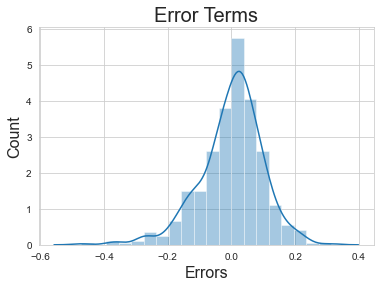

In [53]:
# Plotting an histogram of the error terms
res = y_train - y_train_pred
sns.distplot(res, bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

#### From above Error Terms, the errors are normarlly distrubuted with mean = 0 

## Step 6: Make predictions - Put the model for use

In [54]:
num_vars = ['temp','hum','windspeed','cnt']
test_df[num_vars] = scaler.transform(test_df[num_vars])

In [55]:
test_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [56]:
test_df.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Split test data into X and y datasets

In [57]:
y_test = test_df.pop('cnt')
X_test = test_df

In [58]:
X_test_new = X_test[X.columns]
X_test_new = sm.add_constant(X_test_new)

In [59]:
X_test_new.head()

,const,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Jul,mnth_Sep,weathersit_Light rain
184,1.0,0,1,0.831783,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0


In [60]:
# Making predictions:
y_test_pred = lm.predict(X_test_new)

#### Calculate R2 Square

In [61]:
#import required library to calculate r2_score
from sklearn.metrics import r2_score

In [62]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7888115946045293

In [63]:
Adj_r2=1-(1-0.7888115946045293)*(10-1)/(10-1-1)
print(Adj_r2)

0.7624130439300955


#### R2 score comparisions

Training dataset:
=> r2 is 0.80, adjusted r2 is 0.80

Testing data predictions:
=> r2 is 0.78, adjusted r2 is 0.76

Observation:
=> It can be seen that the variation in r2 and adjust values is within 2%-4%, so it can be said that the model has been built well.

In [64]:
X_train_new=X_train_sm.drop(['const'], axis=1)
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light rain,weathersit_Mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [65]:
X_t=X_train_new.iloc[:,0].values

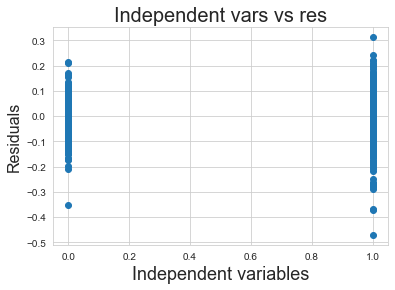

In [66]:
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
plt.title('Independent vars vs res', fontsize=20)       # Plot heading 
plt.xlabel('Independent variables', fontsize=18)           # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

## Step 7: Model Evaluation

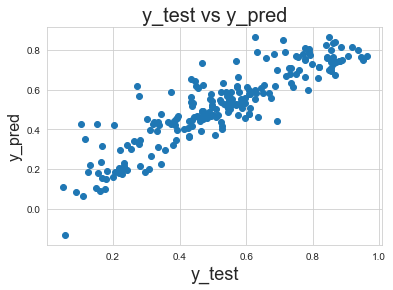

In [67]:
# Plotting y_test and y_pred to understand the spread:
plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

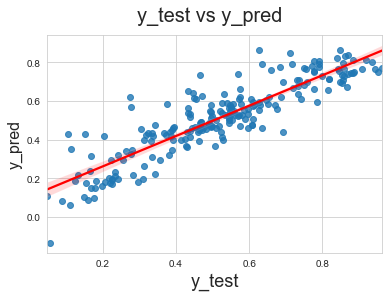

In [68]:
#Regression plot.
fig = plt.figure()
sns.regplot(y_test,y_test_pred,line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [69]:
print(X_train_sm.columns)
print(lm.summary())

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light rain'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          5.33e-171
Time:                        21:50:35   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err